# Imports
How to load PH, critical points and critical sizes

In [23]:
import numpy as np
import pickle

import sys
module_paths = ['']
for path in module_paths :
    if path not in sys.path:
        sys.path.append(path)

from utils_load_PHloc import (extract_PH_heatmaps_single_sample,
contour_heatmaps,
get_PH_alldims,
collect_paired_crit_sizes,
collect_indiv_crit_sizes)

from utils_load_PHloc import datasets_of_interest, injected_datasets_of_interest, levels_of_interest

# Choose dataset

In [24]:
################ CHOOSE DATASET

# choose desired dataset
dataset = 27 # upto 27
# choose desired anatomy: 'knee', 'long', 'both' (which is a merge of the birth-death points)
anatomy = 'knee'

# print useful info
ind = datasets_of_interest.index(dataset) # index in the list
injected = injected_datasets_of_interest[ind]
level = levels_of_interest[ind]
print('dataset {} anatomy {}'.format(dataset, anatomy))
print('injected {} at level {} %'.format(injected, level))

dataset 27 anatomy knee
injected SS at level 76 %


# Load PH diagrams
PH diagrams, birth points locations, death points locations

In [25]:
# folder where you put the PHloc files

PH_folder = '' 


In [26]:
############## LOAD

# load file
filepath = PH_folder + 'PH_all_{}.pkl'.format(anatomy)
print('I will load',filepath)
PH_all_datasets = pickle.load(open(filepath, 'rb'))

# load PH
diagrams = PH_all_datasets[dataset]

print(diagrams.shape)

# diagrams contains birth-death values and dimensionality of the PH

I will load PH_all_knee.pkl
(725907, 3)


# Threshold, magnitude truncation

In [27]:
################ THRESHOLD, TRUNC_MAG

# defaut values: THR = .5 ; TRUNC_MAG = None (no truncation in magnitude)
THR = .5
TRUNC_MAG = None


In [28]:
# discard low-persistence points

diagrams = diagrams[diagrams[:,1] >= diagrams[:,0] + THR]


In [29]:
# truncate high-magnitude values in PH
# discard any couple of critical values such that one of them is of magnitude greater than TRUNC_MAG

if TRUNC_MAG is not None :
    PH0, PH1, PH2 = get_PH_alldims(diagrams, THR)
    
    X0,Y0 = PH0.T
    X1,Y1 = PH1.T
    X2,Y2 = PH2.T
    
    PH0 = PH0[ (np.abs(X0) < TRUNC_MAG) * (np.abs(Y0) < TRUNC_MAG) ]
    PH1 = PH1[ (np.abs(X1) < TRUNC_MAG) * (np.abs(Y1) < TRUNC_MAG) ]
    PH2 = PH2[ (np.abs(X2) < TRUNC_MAG) * (np.abs(Y2) < TRUNC_MAG) ]

    X0,Y0 = PH0.T
    X1,Y1 = PH1.T
    X2,Y2 = PH2.T
    
    PH0_ = np.hstack(( PH0, 0 * np.ones(len(PH0))[:,None] ) )
    PH1_ = np.hstack(( PH1, 1 * np.ones(len(PH1))[:,None] ) )
    PH2_ = np.hstack(( PH2, 2 * np.ones(len(PH2))[:,None] ) )
    
    diagrams = np.vstack((PH0_, PH1_, PH2_))

# Heatmaps

In [30]:
################ PARAMETERS

# default values used: WEIGHTS = True (dirac masses weighted by persistence) ; SIGMA = .5

WEIGHTS = True
SIGMA = .5

# Binning parameters
XLIMS = np.array([[-15,0],[-10,10],[0,20]])
YLIMS = np.array([[-8,7],[-5,15],[0,20]])
NB_BINS_PER_SIDE = 100


excluded low-persistence points


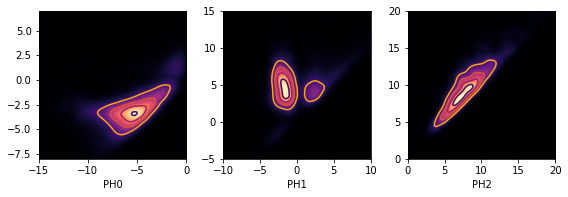

In [31]:
############# OBTAIN HEATMAPS

# compute density heatmaps
PH_heatmaps = extract_PH_heatmaps_single_sample(diagrams, THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops')
# plot contour heatmaps
contour_heatmaps(PH_heatmaps, XLIMS, YLIMS)

# PH and critical sizes

In [32]:
############# OBTAIN PH AND CRITICAL SIZES

# get PH in dimensions 0, 1, 2
PH0, PH1, PH2 = get_PH_alldims(diagrams, THR)


In [33]:
# collect critical sizes in paired form

r0_r1, r0_g1, r1_r2, r1_g2, g1_g2, r2_g3, g2_g3 = collect_paired_crit_sizes(diagrams, threshold = THR, trunc_mag = TRUNC_MAG)
# e.g. r1 from the r1_g2 pairs is r1_g2[0], but not to be confused with r1 which merges all possible r1 from all corresponding pairs (r0_r1, r1_r2, r1_g2)


In [34]:
# collect critical sizes in individual form

r0,r1,r2,g1,g2,g3 = collect_indiv_crit_sizes(diagrams, threshold = THR, trunc_mag = TRUNC_MAG)
# e.g. here r1 comes from all the pairs of the form (r0_r1, r1_r2, r1_g2)


In [35]:
r0.shape


(6895,)